# **Machine Learning** _Day 101_
##### Name: Muhammad Hassaan
##### Date: August 12, 2024
##### Email: muhammadhassaan7896@gmail.com

---

# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

## **1. Introduction**

- **Definition**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed and marks points in low-density regions as outliers.
- **Purpose**: To identify clusters of varying shapes and sizes and detect outliers in a dataset.

## **2. Key Concepts**

- **Density**: Clusters are formed based on the density of points. A cluster is a region with a high density of points.
- **Core Points**: Points that have at least a minimum number of neighboring points within a specified distance.
- **Border Points**: Points that are within the neighborhood of a core point but do not have enough neighbors to be a core point themselves.
- **Noise Points**: Points that do not belong to any cluster (i.e., points in low-density regions).

## **3. Steps in DBSCAN**

1. **Select Parameters**: Choose the distance threshold (ε) and the minimum number of points (minPts).
2. **Label Points**:
   - **Core Point**: If a point has at least minPts within a distance ε, it is a core point.
   - **Border Point**: If a point is within ε of a core point but is not a core point itself.
   - **Noise Point**: If a point is not within ε of any core point.

   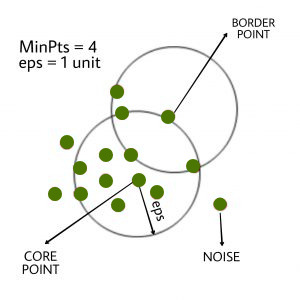

    
3. **Form Clusters**:
   - Start with an arbitrary core point, form a cluster, and expand it by including neighboring points if they are also core points.
   - Repeat the process for all unvisited core points.
4. **Assign Noise Points**: Any points not belonging to any cluster are labeled as noise.

## **4. Advantages**

- **No Need for Number of Clusters**: Unlike K-means, DBSCAN does not require specifying the number of clusters in advance.
- **Can Identify Arbitrary Shapes**: Can find clusters of arbitrary shape and size.
- **Robust to Noise**: Effectively handles noise and outliers.

## **5. Disadvantages**

- **Parameter Sensitivity**: Requires careful selection of ε and minPts. Poor choice of parameters can lead to ineffective clustering.
- **Scalability**: Performance may degrade with large datasets.
- **Not Ideal for High-Dimensional Data**: May struggle with high-dimensional data due to the "curse of dimensionality."

## **6. Key Parameters**

- **ε (Epsilon)**: The maximum distance between two samples for them to be considered as in the same neighborhood.
- **minPts**: The minimum number of points required to form a dense region (cluster).

## **7. Key Points to Consider**

- **Choosing ε**: Often done using a k-distance graph where ε is selected based on the "elbow" of the graph.
- **Choosing minPts**: Typically set to a value greater than the dimensionality of the data. A common heuristic is minPts = 2 * dimensionality.


---

### **DBSCAN Example**

---

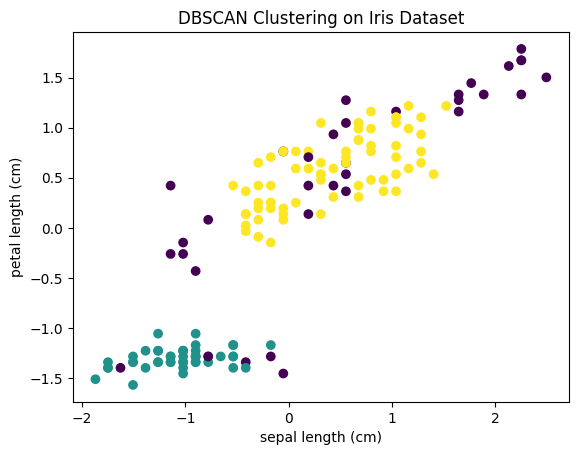

In [7]:
# import libraries 
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# load the iris dataset
iris = load_iris()
X = iris.data

# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# fit the model
dbscan.fit(X_std)

# plot the data points with color-coded cluster 
plt.scatter(X_std[:, 0], X_std[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

## **Hyperparameters for DBSCAN**

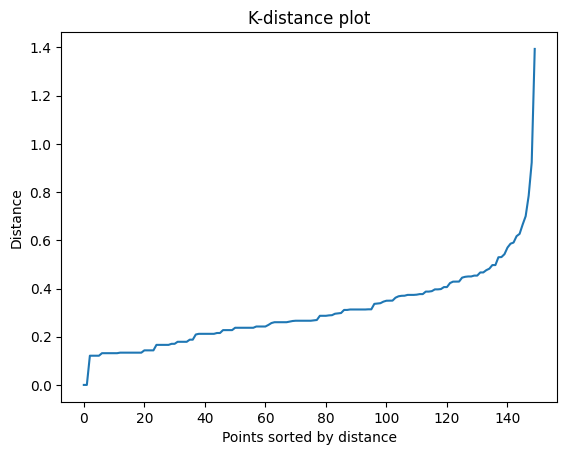

In [8]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# load the `iris` dataset
df = sns.load_dataset('iris')

# normalize the features 
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# find the nearest neighbors 
nbrs = NearestNeighbors(n_neighbors=5).fit(features)
distances, indices = nbrs.kneighbors(features)

# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance')
plt.title('K-distance plot')
plt.show()

### **Elbow Point**

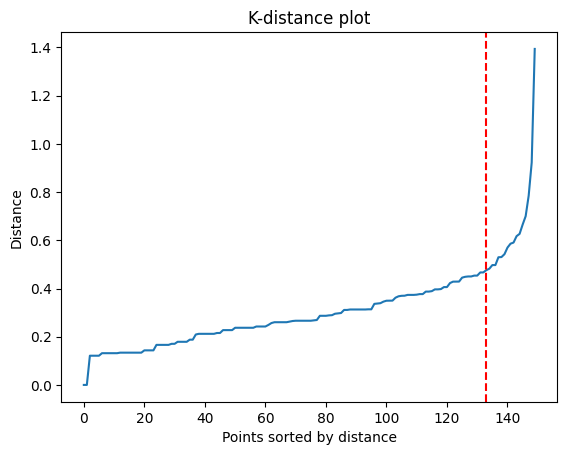

The value of eps is:  0.4760712736677158


In [10]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# load the `iris` dataset
df = sns.load_dataset('iris')

# normalize the features 
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# find the nearest neighbors 
nbrs = NearestNeighbors(n_neighbors=5).fit(features)
distances, indices = nbrs.kneighbors(features)

# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# identify the `elbow` in the k-distance plot
kneedle = KneeLocator(range(1, len(distances)+1), distances, S=1.0, curve='convex', direction='increasing')
elbow_index = kneedle.elbow

# plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance')

# add a vertical line at the `elbow` point
plt.axvline(x=elbow_index, color='red', linestyle = "--")
plt.title('K-distance plot')
plt.show()

# print the values of `eps`
print("The value of eps is: ", distances[elbow_index])

---

### **Finding the Best Number of minPts for DBSCAN**

Selecting the optimal number of `minPts` (minimum points) is crucial for the DBSCAN algorithm to effectively cluster data and detect noise. Here’s a step-by-step guide to determine the best value for `minPts`:

---

## **1. Understanding minPts**

- **Definition**: `minPts` is the minimum number of points required to form a dense region (a cluster). A core point must have at least `minPts` within its ε-neighborhood.
- **Default Value**: A common heuristic is to set `minPts` to `2 * dimensionality of the data`. For instance, for a 2D dataset, a good starting point is `minPts = 4`.

## **2. Heuristic Method**

### **a. Dimensionality-Based Heuristic**

- **Rule of Thumb**: `minPts = 2 * d`, where `d` is the number of dimensions.
  - **Example**: For a 2D dataset, start with `minPts = 4`.

### **b. Minimum Requirement**

- **Minimum Value**: Ensure `minPts` is not less than 3, as lower values might lead to overfitting or too many noise points.

## **3. Using Domain Knowledge**

- **Contextual Information**: If domain knowledge is available, adjust `minPts` based on the expected density and structure of the data.
  - **Example**: In a dataset with highly varying densities, domain knowledge might suggest a higher `minPts` to account for natural variations.

## **4. Empirical Testing**

### **a. K-Distance Plot**

1. **Calculate Distances**: Compute the distance to the k-th nearest neighbor for each point, where `k` is a potential value for `minPts`.
2. **Plot**: Create a k-distance graph and look for an "elbow" point where the distance starts increasing rapidly.
   - **Choosing minPts**: Set `minPts` just above this elbow point to ensure that clusters are well-formed.


### **b. Experimentation**

- **Trial and Error**: Test different values of `minPts` to see how clustering results change. Evaluate the stability and quality of clusters.
  - **Evaluation**: Use metrics such as silhouette score or visual inspection to determine the most appropriate `minPts`.

## **5. Practical Guidelines**

- **General Rule**: Start with `minPts = 2 * d` and adjust based on the k-distance graph and clustering results.
- **Adjust Dynamically**: If you encounter too many noise points or poorly defined clusters, increase `minPts`.

## **6. Conclusion**

Choosing the best `minPts` value requires balancing between underfitting and overfitting. Utilize heuristics, domain knowledge, and empirical testing to determine an optimal value that fits your specific dataset.

--- 

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns 
import numpy as np 

# load the `iris` dataset
df = sns.load_dataset('iris')

# normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# use the previously calculated 'eps' (from the k-distance plot)
eps = 0.4760712736677158

# define the range for minpts
minpts_range = range(2, 11)

# initialize the variable to store the best 'minpts' and the corresponding silhouette score 
best_minpts = -1
best_silhouette_score = -float('inf')

# gird search over the 'minpts' range
for minpts in minpts_range:
    dbscan = DBSCAN(eps=eps, min_samples=minpts)
    labels = dbscan.fit_predict(features)

    # ignore execution if no clusters were found
    if len(np.unique(labels)) < 2 or (labels == -1).all():
        continue

    silhouette = silhouette_score(features, labels)
    print(f'minpts: {minpts}, sillhouette score: {silhouette}')

    # update the best 'minpts' and the corresponding 'silhouette score'
    if silhouette > best_silhouette_score:
        best_minpts = minpts
        best_silhouette_score = silhouette

# print the best 'minpts' and the corresponding 'silhouette score'
print(f'best minpts: {best_minpts}, best silhouette score: {best_silhouette_score}')

minpts: 2, sillhouette score: 0.013247475183654014
minpts: 3, sillhouette score: 0.04774328680741217
minpts: 4, sillhouette score: 0.07514115365746908
minpts: 5, sillhouette score: 0.23537733019879264
minpts: 6, sillhouette score: 0.17469802826964867
minpts: 7, sillhouette score: 0.1208531749279706
minpts: 8, sillhouette score: 0.07300509931315881
minpts: 9, sillhouette score: -0.0012073454535711766
minpts: 10, sillhouette score: 0.3935034625685355
best minpts: 10, best silhouette score: 0.3935034625685355
